In [1]:
import tensorflow as tf

ModuleNotFoundError: No module named 'tensorflow'

In [2]:
from tensorflow import keras

ModuleNotFoundError: No module named 'tensorflow'

In [3]:
import numpy as np

In [4]:
import cv2

In [5]:
import os
import matplotlib.pyplot as plt

In [6]:
DIR='C:/Users/satvi/Desktop/notebooks/cascade_haar_file'
Categories=['p_train' ,'n_train']

In [7]:
pwd

'C:\\Users\\satvi\\Desktop\\notebooks'

In [8]:
cd cascade_haar_file

C:\Users\satvi\Desktop\notebooks\cascade_haar_file


In [9]:
pwd

'C:\\Users\\satvi\\Desktop\\notebooks\\cascade_haar_file'

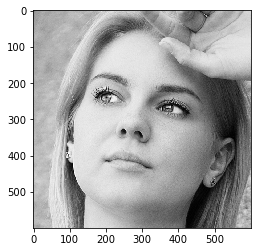

In [10]:
for category in Categories:
    #os.path.join() method in Python join one or more path components intelligently
    path=os.path.join(DIR,category)
    for img in os.listdir(path):
        img_arr=cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_arr,cmap="gray")
        plt.show()
        break
    break

In [11]:
print(img_arr)

[[145 143 143 ... 222 222 223]
 [137 145 146 ... 221 218 217]
 [139 140 140 ... 216 218 222]
 ...
 [185 184 178 ... 177 181 193]
 [185 181 174 ... 177 177 184]
 [182 179 176 ... 169 170 180]]


In [12]:
print(img_arr.shape)

(600, 600)


In [13]:
Img_size=100

In [14]:
new_arr=cv2.resize(img_arr,(Img_size,Img_size))

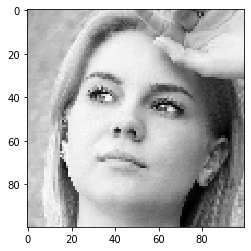

In [15]:
plt.imshow(new_arr,cmap='gray')
plt.show()

In [16]:
training_set=[]
def create_training():

        for category in Categories:
            class_num=Categories.index(category)
        #os.path.join() method in Python join one or more path components intelligently
            path=os.path.join(DIR,category)
            for img in os.listdir(path):
                img_arr=cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)
                new_arr=cv2.resize(img_arr,(Img_size,Img_size))
                training_set.append([new_arr,class_num])
create_training()    


In [17]:
 print(len(training_set))

2161


In [18]:
import random

In [19]:
random.shuffle(training_set)

In [20]:
for sample in training_set[:10]:
    print(sample[1])

1
1
1
1
0
1
1
1
1
1


In [21]:
X=[]
Y=[]
for features,labels in training_set:
    X.append(features)
    Y.append(labels)

In [22]:
X=np.array(X).reshape(-1,Img_size,Img_size,1)

In [23]:
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D


In [24]:
model=Sequential()
model.add(Conv2D(64,(3,3) ,input_shape=(100,100,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64 ,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('softmax'))

model.compile(loss='binary_crossentropy' , optimizer='adam'  ,metrics=['accuracy'] )


model.fit(X,Y, batch_size=10 ,epochs=5 ,validation_split=0.1)


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 1944 samples, validate on 217 samples
Epoch 1/5
1944/1944 [==============================] - 34s 17ms/sample - loss: 5.4187 - acc: 0.6466 - val_loss: 5.2002 - val_acc: 0.6590
Epoch 2/5
1944/1944 [==============================] - 29s 15ms/sample - loss: 5.4187 - acc: 0.6466 - val_loss: 5.2002 - val_acc: 0.6590
Epoch 3/5
1944/1944 [==============================] - 29s 15ms/sample - loss: 5.4187 - acc: 0.6466 - val_loss: 5.2002 - val_acc: 0.6590
Epoch 4/5
1944/1944 [==============================] - 37s 19ms/sample - loss: 5.4187 - acc: 0.6466 - val_loss: 5.2002 - val_acc: 0.6590
Epoch 5/5
1944/1944 [==============================] - 39s 20ms/sample - loss: 5.4187 - acc: 0.6466 - val_loss: 5.2002 - val_acc: 0.6590


In [25]:
model.save("model.h5")

In [26]:
model=keras.models.load_model("model.h5")

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [27]:
predict=model.predict()

TypeError: predict() missing 1 required positional argument: 'x'

In [28]:
pwd

'C:\\Users\\satvi\\Desktop\\notebooks\\cascade_haar_file'

In [31]:
DIR='C:/Users/satvi/Desktop/notebooks/cascade_haar_file'
Categories1=['p_test' ,'n_test']

In [33]:
Img_size=100
test_set=[]
def create_test():

        for category in Categories1:
            class_num=Categories1.index(category)
        #os.path.join() method in Python join one or more path components intelligently
            path=os.path.join(DIR,category)
            for img in os.listdir(path):
                img_arr1=cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)
                new_arr1=cv2.resize(img_arr,(Img_size,Img_size))
                test_set.append([new_arr1,class_num])
create_test()    

In [34]:
print(len(test_set))

920


In [36]:
x=[]
y=[]
for features_test,labels_test in test_set:
    x.append(features_test)
    y.append(labels_test)

In [37]:
x=np.array(x).reshape(-1,Img_size,Img_size,1)

In [39]:
predict=model.predict(x,y)

TypeError: float() argument must be a string or a number, not 'list'